## ECE 172A Laboratory Notebooks
---

This Juypter notebook is part of a series of computer laboratories which are designed
to teach image-processing programming. They are the practical complement of the theoretical lectures of the UCSD's course 
[**ECE 172A**](https://canvas.ucsd.edu/courses/62410) taught by Prof. Rahul Parhi.

---
# Lab 1: Pixel operations and Fourier Transform
**Released**: Tuesday, January 21, 2025  
**Due**: Wednesday, January 29, 2025 at 11:55pm

### Imports
In the next cell we import the python libraries and load the images that we will use throughout the lab.

Run the next cell to get your notebook ready.

<div class=" alert alert-danger">
  <b>Note:</b> Always run the two import cells below before working on the notebook.    
</div>

In [8]:
# Import required packages for this lab
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
import time

# Loading images
hrct = io.imread("images/hrct.tif").astype('float64')
joux = io.imread("images/joux.tif").astype('float64')
car = io.imread("images/car_pad.tif").astype('float64')
mandrill = io.imread("images/mandrill.tif").astype('float64')
impulse = np.zeros((65,65)); impulse[32,32] = 1;
pens = io.imread("images/pens.tif").astype('float64')
zebra = io.imread("images/zebra.tif").astype('float64')

Creating dictionary for all answers

In [9]:
answers = {} # Put your answers to each question in this dictionary

# Pixel-wise operations (7 points)

In this laboratory you will learn the basics of pixel-wise image processing by performing simple operations at a pixel level. This has many practical applications such as image normalization, colorization, and just to get information of an image. However, part of the goal of this laboratory is for you to feel comfortable with the process of accessing pixels of an image in both a high-level and a low-level language.

## <a id="ToC_1_Pixelwise_operations"></a>Table of contents
1. [16-bit gray-scale images: Visualization and Colorization](#1.-16-bit-gray-scale-images:-visualization-and-colorization-(3-points)) 
    1. [Limitations in visualization](#1.A.-Limitations-in-visualization-(1-point)) **(1 point)**
    2. [Colorization](#1.B.-Colorization-(2-points)) **(2 points)**
2. [Image normalization](#2.-Image-normalization-(4-points)) **(4 points)**

# 1. 16-bit gray-scale images: visualization and colorization (3 points)
[Back to Table of contents](#ToC_1_Pixelwise_operations)


Most standard screens use $8$ bits to display gray-level images, allowing for $2^8 = 256$ different gray-levels to be shown simultaneously. However, some applications like medical imaging require more than 256 values to store essential information. Medical images such as [HRCT](https://en.wikipedia.org/wiki/High-resolution_computed_tomography) are stored in 16-bit images with $2^{16} = 65536$ different gray-levels, which cannot be fully displayed on a standard screen at once. To address this limitation, a solution is to use [colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html), which divide the range of gray-levels into sub-ranges of different colors. Colormaps increase contrast on an image and compensate for the inability of standard screens and human eyes to distinguish such a large number of gray shades. 

In the following section, the limitations of displaying a 16-bit grayscale image on a standard screen will be explored, followed by the application of colorization techniques to address this issue.

## 1.A. Limitations in visualization (1 point)
[Back to Table of contents](#ToC_1_Pixelwise_operations)

To illustrate the problem we will look at the image `hrct`, which is encoded with $16$ bits. The image shows the result of a [computed tomography](https://en.wikipedia.org/wiki/CT_scan) scan of a human thorax. These type of images can, for example, be used to diagnose or assess the developement of COVID-19 in patients ([see more here](https://radiologyassistant.nl/chest/covid-19/covid19-imaging-findings)). 

Run the next cell and explore the gray-level range. Try to find hidden content in the image that is not visible at first (at first you will only see the thorax). 

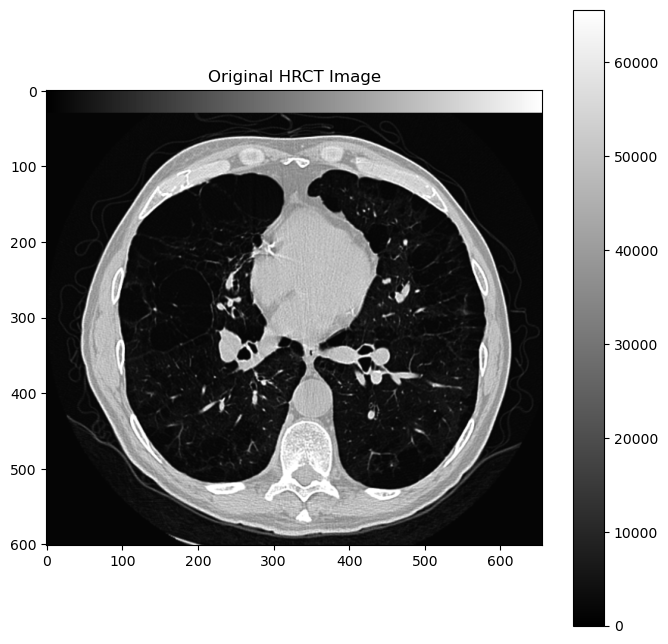

In [10]:
# Display the hrct image to find hidden information
plt.close("all")

# Function to plot the image with adjustable gray levels
def plot_image_with_gray_range(image, vmin=None, vmax=None, title=None):
    plt.figure(figsize=(8, 8))
    plt.imshow(image, cmap='gray', vmin=vmin, vmax=vmax)
    plt.colorbar()
    if title:
        plt.title(title)
    plt.show()

# Display the original image
plot_image_with_gray_range(hrct, title="Original HRCT Image")

<div class="alert alert-info">
    
**Hint:** You can adjust the gray-level range of the image by adjusting the values (max / min). Observe the image. 
</div>

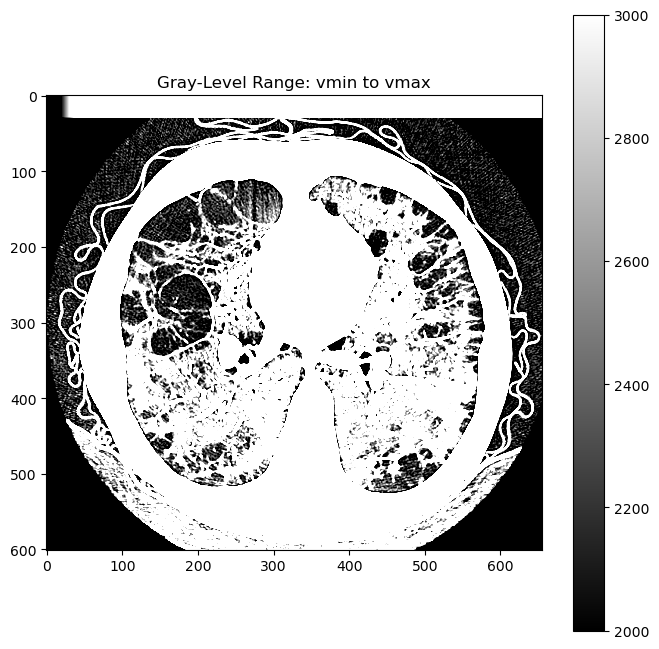

In [11]:
# try different values for vmin and vmax
# YOUR CODE HERE
vmin = 2000
vmax = 3000
plot_image_with_gray_range(hrct, vmin, vmax, title="Gray-Level Range: vmin to vmax")

### Multiple choice question
For **0.5 points each**, once you have explored the image, answer the next questions:

* Q1: How many $8$-bit grayscale images do we need to cover the pixel values spanned by a generic $16$-bit image?
    1. 2
    2. 8
    3. 256
    4. 16

In [12]:
# Assign your answer to this variable
answers['Q1'] = 3
# YOUR CODE HERE

In [13]:
assert answers['Q1'] in [1, 2, 3, 4], 'Possible answers are 1, 2, 3 and 4'

Using color is another option to see more of the information contained in a 16-bit image on screen. This view reveals wide-spread structures within the patient's lungs.

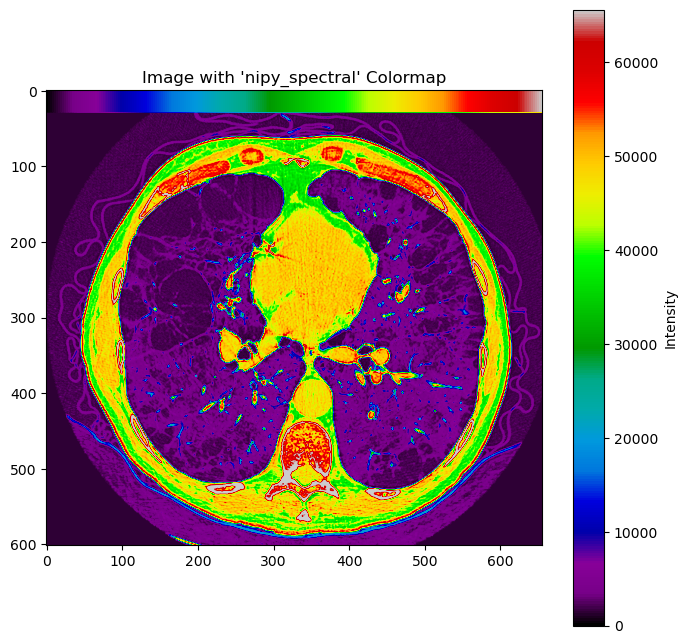

In [14]:
# Display with a colormap
plt.figure(figsize=(8, 8))
plt.imshow(hrct, cmap='nipy_spectral')
plt.colorbar(label="Intensity")
plt.title("Image with 'nipy_spectral' Colormap")
plt.show()

* Q2:  Which of the following ranges of visualization would show those details best with a `gray` colormap?
    1. $0\%$ to $10\%$
    2. $90\%$ to $100\%$
    3. $50\%$ to $60\%$

Modify the variables `answer_one` and `answer_two` in the next cell to reflect your choice.

In [15]:
# Assign your answer to this variable
answers['Q2'] = 2
# YOUR CODE HERE

In [16]:
assert answers['Q2'] in [1, 2, 3, 4], 'Possible answers are 1, 2, 3 and 4'

## 1.B. Colorization (2 points) 
[Back to Table of contents](#ToC_1_Pixelwise_operations)

Color is a powerful tool to overcome the representation limitations of $8$-bit screens. The idea is to represent the 16-bit range of [0, 65535] using three 8-bit channels with a range of [0, 255] each, resulting in a color (RGB) image. There are many alternatives to divide a range into sub-ranges, but for this exercise, we request you to implement the one specified in the picture below:

<img src="images/graylevel_divide_rgb.png" alt="Drawing" style="width: 500px;"/>

The three lines reflect the intensity values of each channel depending on the original graylevel intensity (horizontal axis). $N$ is the maximum graylevel intensity; for a 16-bit image $N=2^{16} - 1$.

For **2 point**, modify the function `color_pixel_wise(img)` in the next cell to iterate through every pixel in the image and create a new colorized image. The three color channels should be defined according to the figure above.
<div class="alert alert-info">

**Note:** You only need to modify the variables `r`, `g` and `b`. Make sure you understand the code and fill in the blanks.
</div>

In [19]:
def color_pixel_wise(img):
    # Define the maximum value for a 16-bit image
    N = (2**16) - 1

    # Initialize output RGB image
    output = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

    for x in range(img.shape[1]):  # Iterate over columns
        for y in range(img.shape[0]):  # Iterate over rows
            value = img[y, x]
            r, g, b = 0, 0, 0
            red_threshold = N/4
            redgreen_threshold = N/2
            bluegreen_threshold = 3*N/4
            blue_threshold = N
            if value < red_threshold:
                r = (255 * value) / red_threshold
            elif red_threshold <= value < redgreen_threshold:
                r = 255 - ((255 * (value - red_threshold)) / red_threshold)
                g = ((255 * (value - red_threshold)) / red_threshold)
            elif redgreen_threshold <= value < bluegreen_threshold:
                g = 255 - ((255 * (value - redgreen_threshold)) / red_threshold)
                b = ((255 * (value - redgreen_threshold)) / red_threshold)
            elif bluegreen_threshold <= value <= blue_threshold:
                b = 255 - ((255 * (value - bluegreen_threshold)) / red_threshold)
            # YOUR CODE HERE
            # compute r, g and b based on the value 
            
            
            # Set the three color channels in the output image (converted to integers)
            output[y, x] = [np.round(r), np.round(g), np.round(b)]
    
    return output


Great, use the cell below to visualize your image. If everything went well, you should see most of the hidden details in red (blood vessels and details inside the lungs), the middle values in green (soft tissues, fat, etc.) and the higher values in blue (aorta, bone tissue, etc.). 

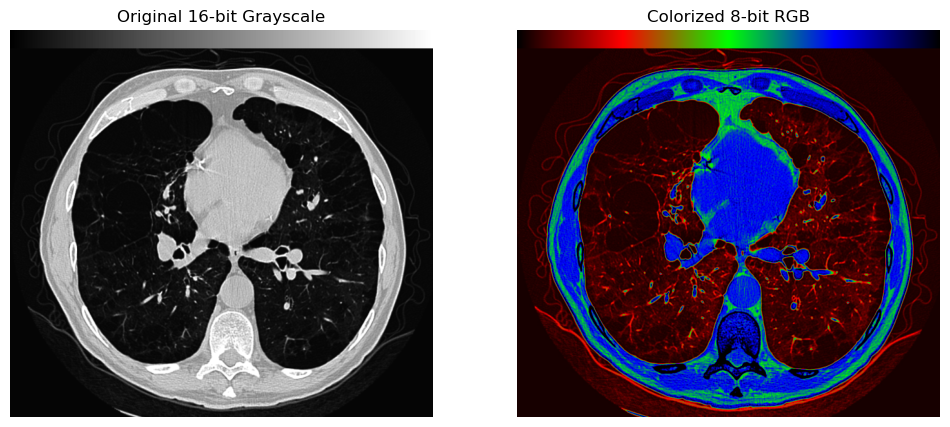

In [21]:
# Convert to RGB
hrct_colorized = color_pixel_wise(hrct)

# Display the original and colorized images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(hrct, cmap='gray')
plt.title("Original 16-bit Grayscale")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(hrct_colorized)
plt.title("Colorized 8-bit RGB")
plt.axis('off')

plt.show()

Check your result by observing the color bar at the top of the image. You should see the color bar transition **smoothly** from black to red, red to green, green to blue, and back to black again.

To ensure the image is indeed a color image and that each channel's values range from $0$ to $255$, let's conduct some sanity checks. 

<div class="alert alert-danger">

<b>Note:</b> The fact that you pass these sanity checks <b>does not</b> guarantee the points.
</div>

In [22]:
# Check that the image has indeed 3 color channels
assert hrct_colorized.shape[2] == 3, "The resulting image doesn't have 3 color channels!"
# Check that the max and min of each channel are 0 and 255
assert np.min(hrct_colorized[:,:,0]) == 0, f"The minimum of the red color channel is {np.min(hrct_colorized[:,:,0])} and not 0!"
assert np.min(hrct_colorized[:,:,1]) == 0, f"The minimum of the green color channel is {np.min(hrct_colorized[:,:,1])} and not 0!"
assert np.min(hrct_colorized[:,:,2]) == 0, f"The minimum of the blue color channel is {np.min(hrct_colorized[:,:,2])} and not 0!"
assert np.max(hrct_colorized[:,:,0]) == 255, f"The maximum of the red color channel is {np.max(hrct_colorized[:,:,0])} and not 255!"
assert np.max(hrct_colorized[:,:,1]) == 255, f"The maximum of the green color channel is {np.max(hrct_colorized[:,:,1])} and not 255!"
assert np.max(hrct_colorized[:,:,2]) == 255, f"The maximum of the blue color channel is {np.max(hrct_colorized[:,:,2])} and not 255!"
print("Congrats, your function passed the sanity checks. However, that does not necessarily mean that everything is correct.")

Congrats, your function passed the sanity checks. However, that does not necessarily mean that everything is correct.


As you observe, this color representation is an improvement over using only one gray-level channel.

# 2. Image normalization (4 points)
[Back to table of contents](#ToC_1_Pixelwise_operations)

Normalization is one of the key preprocessing steps in image processing. In this section, you will learn different ways to normalize an image.

**For a total of 3 points**, complete the three functions below (**1 point each**), which output images normalized with respect to different statistics:

* `makeZeroMean(img)`: Normalizes the image so that the **sample mean of the pixel values is zero**. The standard deviation remains the same.
* `stretchContrast(img)`: Normalizes the image so that the **minimum value is $0$ and the maximum value is $1$ (the ratio $\frac{\sigma}{range}$ should not change)**. 
* `normalize2ndOrderStatistics(img)`: Normalizes the image so that the **sample mean of the pixel values is zero** and the **sample standard deviation is $1$**. 

<div class="alert alert-warning">
    <b>Note:</b> Make sure to calculate the mean and standard deviation outside of the two for loops that iterate through the pixels of the image, otherwise the operation takes much too long to compute for real images!
</div>

First, implement the function `makeZeroMean` in the cell below.

In [23]:
def make_zero_mean(img):
    # Normalizes the image so that the sample mean of the pixel values is zero. The standard deviation remains the same.
    mean_value = np.mean(img)  # Compute mean
    zero_mean_img = img - mean_value  # Subtract mean to make it zero-centered
    return zero_mean_img


Great! Now it's time to test your implementation. We will do two parallel tests: one on a simple $3×3$ array, one on a real image `joux`. If an error is thrown in any of the tests, you implementation is not yet correct. We will also test the execution time of your function, to tell you if you made a mistake. In future labs you will be responsible by yourself to check that you coded an efficient solution.

In [24]:
# Define a test image
test_img = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]], dtype=np.float64)

# Create copy of joux image
joux_img = joux.copy()

# Apply the make_zero_mean function to the test and real images
test_zero_mean = make_zero_mean(test_img)
joux_zero_mean = make_zero_mean(joux_img)

# Measure the duration of the function on the real image
start = time.time()
_ = make_zero_mean(joux_img)
duration = (time.time() - start) * 1000  # Convert to milliseconds

# Check the duration of the function
if duration > 10000:
    print('WARNING!\nThe function `make_zero_mean` is taking way too long. '
          'Make sure to optimize your code. In particular, check that you are not iterating the image an unnecessary number of times.')

# Check if the output for the test image is as expected
expected_test_output = np.array([[-4, -3, -2], [-1, 0, 1], [2, 3, 4]], dtype=np.float64)
if not np.allclose(test_zero_mean, expected_test_output):
    print("WARNING!\nThe function `make_zero_mean` is not yet correct for the test image.")
else:
    print('Nice, the function `make_zero_mean` seems to subtract the mean correctly for the test image!')

# Check if the function behaves correctly on the real image
pixel_diff = np.abs(joux_img[100, 100] - joux_zero_mean[100, 100])
if pixel_diff > 122.66:
    print("WARNING!\nThe function `make_zero_mean` is not yet correct for the real image.")
else:
    print('Nice, the function `make_zero_mean` seems to work on real images!')


Nice, the function `make_zero_mean` seems to subtract the mean correctly for the test image!
Nice, the function `make_zero_mean` seems to work on real images!


Now, implement `stretchContrast`.

In [25]:
def stretch_contrast(img):
    # Normalizes the image so that the minimum value is 0 and the maximum value is 1(the ratio sigma/range should not change).
    output = None
    
    img_min = np.min(img)  # Find minimum pixel value
    img_max = np.max(img)  # Find maximum pixel value

    # Avoid division by zero if all pixel values are the same
    if img_max == img_min:
        return np.zeros_like(img, dtype=np.float32)

    # Normalize the image to range [0, 1]
    output = (img - img_min) / (img_max - img_min)
    
    return output

Run the next cell to run a simple sanity check. Again, we will test on a simple $3\times 3$ image and then on `joux`.

In [26]:
# Declare the test image
test_img = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]], dtype=np.float64)

# Create copy of joux image
joux_img =  joux.copy()

# Run the stretch contrast function on the test image
test_stretch = stretch_contrast(test_img)

# Measure the duration of the function on the real image
start = time.time()
joux_stretch = stretch_contrast(joux_img)
duration = (time.time() - start) * 1000  # Convert to milliseconds

# Check the duration of the function
if duration > 10000:
    print('WARNING!\nThe function `stretch_contrast` is taking way too long. '
          'Make sure to optimize your code. In particular, check that you are not iterating the image an unnecessary number of times.')

# Compare the result to the correct result
expected_test_output = np.array([[0, 0.125, 0.25], [0.375, 0.5, 0.625], [0.75, 0.875, 1]], dtype=np.float64)
if not np.allclose(test_stretch, expected_test_output):
    print("WARNING!\nThe function `stretch_contrast` is not yet correct.")
else:
    print('Nice, the function `stretch_contrast` seems to produce the correct output!')

# Check if the function works on the real image
if not np.isclose(np.max(joux_stretch), 1):
    print("WARNING!\nThe function `stretch_contrast` does not work on real images.")
else:
    print('Nice, the function `stretch_contrast` is working on real images!')

Nice, the function `stretch_contrast` seems to produce the correct output!
Nice, the function `stretch_contrast` is working on real images!


In [27]:
def normalize_2nd_order_statistics(img):
    # Normalizes the image so that the sample mean of the pixel values is 0 and the sample standard deviation is 1.
    output = None
    
    mean_value = np.mean(img)  # Compute mean
    std_dev = np.std(img)  # Compute standard deviation

    # Avoid division by zero if all pixel values are the same
    if std_dev == 0:
        return np.zeros_like(img, dtype=np.float32)

    # Normalize the image
    output = (img - mean_value) / std_dev
    
    return output


Finally, implement the function `normalize2ndOrderStatistics`.

And run the next cell for a quick test again.

In [28]:
# Test image
test_img = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]], dtype=np.float64)

# Create copy of joux image
joux_img = joux.copy()

# Run the function on the test image
test_normalize = normalize_2nd_order_statistics(test_img)

# Measure execution time for the real image
start = time.time()
joux_normalize = normalize_2nd_order_statistics(joux_img)
duration = (time.time() - start) * 1000  # Convert to milliseconds

# Check execution time
if duration > 10000:
    print('WARNING!\nThe function `normalize_2nd_order_statistics` is taking way too long. '
          'Make sure to optimize your code. In particular, check that you are not iterating the image an unnecessary number of times.')

# Validate the output for the test image
expected_unbiased = np.array([[-1.4605934866804429, -1.0954451150103321, -0.7302967433402214],
                               [-0.3651483716701107,  0.0,  0.3651483716701107],
                               [ 0.7302967433402214,  1.0954451150103321,  1.4605934866804429]])

expected_biased = np.array([[-1.5491933384829668, -1.161895003862225, -0.7745966692414834],
                            [-0.3872983346207417,  0.0,  0.3872983346207417],
                            [ 0.7745966692414834,  1.161895003862225,  1.5491933384829668]])

if not np.allclose(test_normalize, expected_unbiased):
    if not np.allclose(test_normalize, expected_biased):
        print("WARNING!\nThe function `normalize_2nd_order_statistics` is not yet correct!")
    else:
        print("Good job! The function `normalize_2nd_order_statistics` seems to produce the correct output! "
              "You're using the biased estimator of the variance.")
else:
    print("Good job! The function `normalize_2nd_order_statistics` seems to produce the correct output! "
          "You're using the unbiased estimator of the variance.")

# Check if the function works correctly on the real image
if not (np.isclose(np.max(joux_normalize), 1.49, atol=0.01) and np.isclose(np.min(joux_normalize), -1.38, atol=0.01)):
    print("WARNING!\nThe function `normalize_2nd_order_statistics` is not working on real images!")
else:
    print("Good job! The function `normalize_2nd_order_statistics` seems to be working on real images.")

Good job! The function `normalize_2nd_order_statistics` seems to produce the correct output! You're using the biased estimator of the variance.
Good job! The function `normalize_2nd_order_statistics` seems to be working on real images.


In order for you to see the relevance of image normalization, we provide a sequence of fluorescence microscopy images (see more [here](https://en.wikipedia.org/wiki/Fluorescence_microscope)), named `c_elegans`. These are consecutive slices of the same 3D volume but appear darker over time due to photobleaching (the loss of fluorescence, read more [here](https://en.wikipedia.org/wiki/Photobleaching)). Of course, this is a huge problem for the application, and to solve it we absolutely need to normalize these images.

Run the next cell to load the `c_elegans` series, and display it. We will use the module [io](https://scikit-image.org/docs/0.8.0/api/skimage.io.html) of SciKit-Image, which allows us to read all the slices of a `.tif` file at once. Furthermore, we will pass it to JS so that we can use the functions you defined above.

<div class = ' alert alert-success'>
<b>Hint</b>: In the next cell, you will see the original images, and in the later one, a graph that shows the effect of photobleaching on the mean value of each image. Make sure you explore the images and their histogram by clicking on the <code>Prev</code> and <code>Next</code> buttons!
</div>

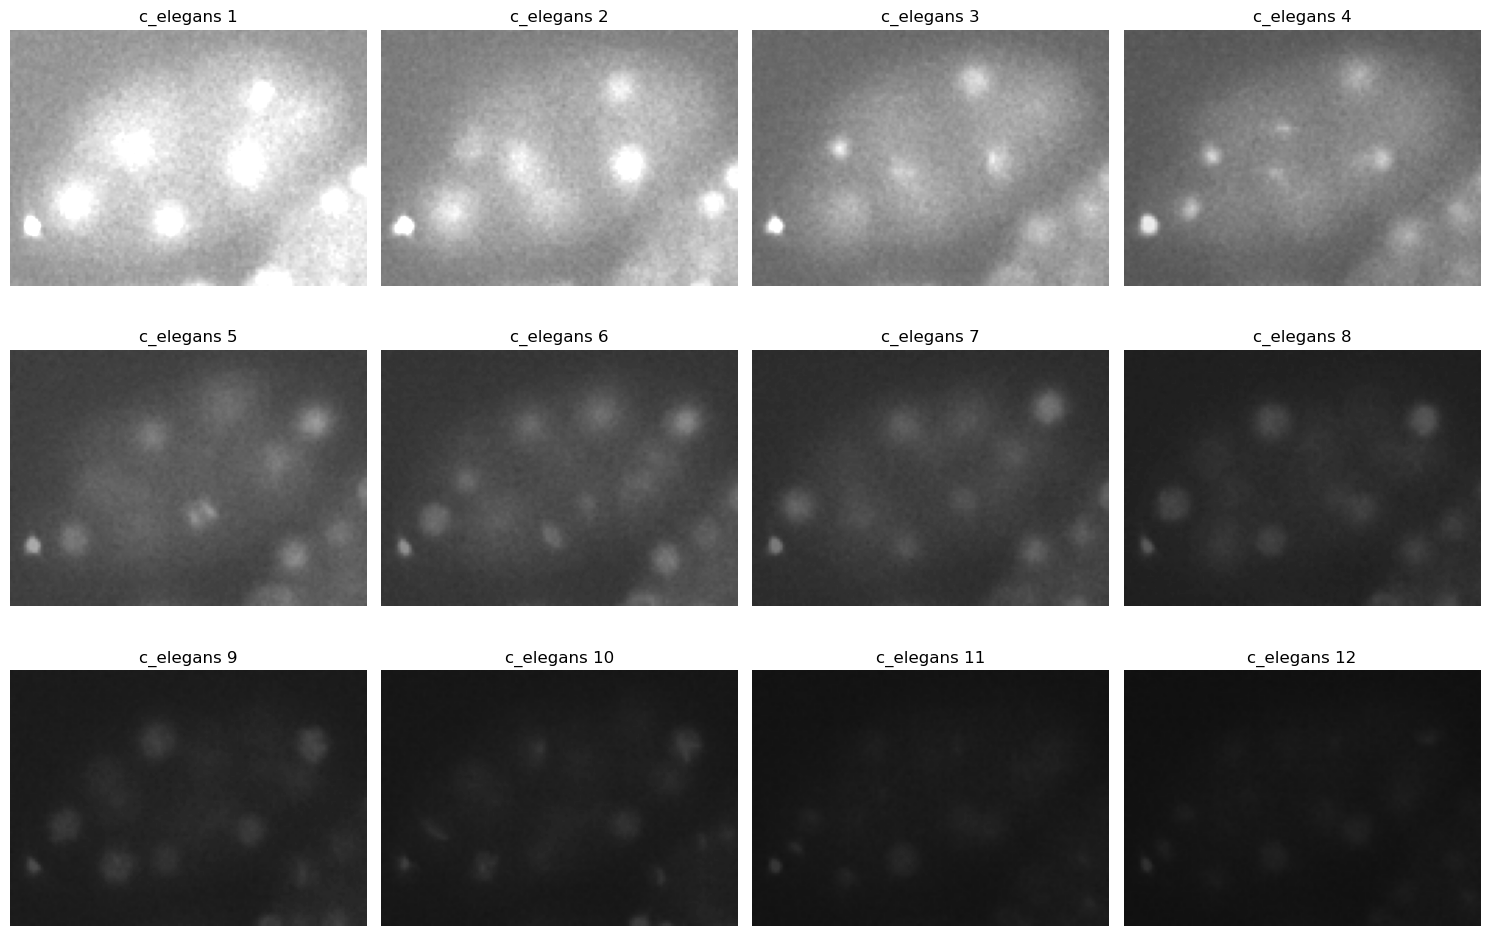

In [29]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

# Load the c-elegans image stack
c_elegans = io.imread("images/c-elegans.tif")

# Display the c-elegans images
plt.close("all")
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
axes = axes.ravel()
for ind in range(12):
    axes[ind].imshow(c_elegans[ind, :, :], cmap='gray', vmin=0, vmax=255)
    axes[ind].set_title(f"c_elegans {ind+1}")
    axes[ind].axis('off')
plt.tight_layout()
plt.show()

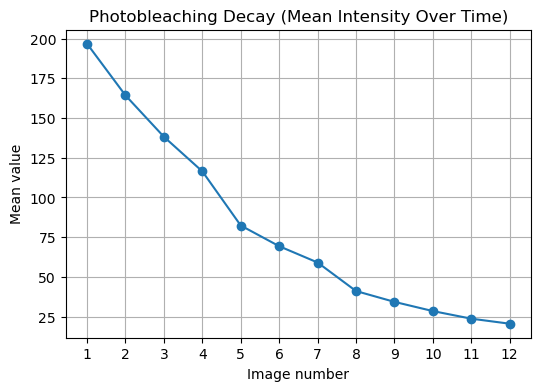

In [30]:
# Show the decay of the mean value through time due to photobleaching
mean_values = [np.mean(c_elegans[ind, :, :]) for ind in range(12)]
fig = plt.figure(figsize=(6, 4))
plt.plot(range(1, 13), mean_values, marker='o')
plt.xticks(range(1, 13))
plt.xlabel("Image number")
plt.ylabel("Mean value")
plt.title("Photobleaching Decay (Mean Intensity Over Time)")
plt.grid('both')
plt.show()

Now we are going to visualize the effect of each of your normalizing functions on `c_elegans`. For this purpose, we provide with you the function `make_montage(img_arr, mode, cols)`. It performs the operation specified by `mode` (1: zero mean, 2: stretch contrast, 3: normalize statistics) on each image, then places the result in the right place inside the montage `out`.

Now run the next cell to declare the function `makeMontage()`.

In [31]:
# Function to create a montage
def make_montage(img_arr, mode, cols):
    h, w = img_arr[0].shape
    rows = len(img_arr) // cols
    montage = np.zeros((h * rows, w * cols), dtype=np.float64)
    
    for t in range(len(img_arr)):
        img = img_arr[t]
        if mode == 1:
            img = make_zero_mean(img)
        elif mode == 2:
            img = stretch_contrast(img)
        elif mode == 3:
            img = normalize_2nd_order_statistics(img)
        
        # Compute position in the montage
        row = t // cols
        col = t % cols
        montage[row * h:(row + 1) * h, col * w:(col + 1) * w] = img
    
    return montage

Now, we are going apply your methods to the image slices we just loaded. First, we convert each element in the array `c_elegans`  to an `Image` object. Then, we call the function on the array with each of the three modes to visualize the result of the functions that you implemented above.

In [32]:
# Load the c-elegans image stack
c_elegans = io.imread("images/c-elegans.tif")

# Create montages for each normalization mode
montage_original = make_montage(c_elegans, 0, 3)
montage_zero_mean = make_montage(c_elegans, 1, 3)
montage_stretch_contrast = make_montage(c_elegans, 2, 3)
montage_normalize_statistics = make_montage(c_elegans, 3, 3)

Now that we have applied your functions and that we have the variables in Python, let's visualize them. Run the following cell to do so. Use the buttons `Next` and `Prev` to browse through the three images. If your implementations passed the previous tests, you should see the correct result. Look carefully at the images and solve the two MCQs coming next.

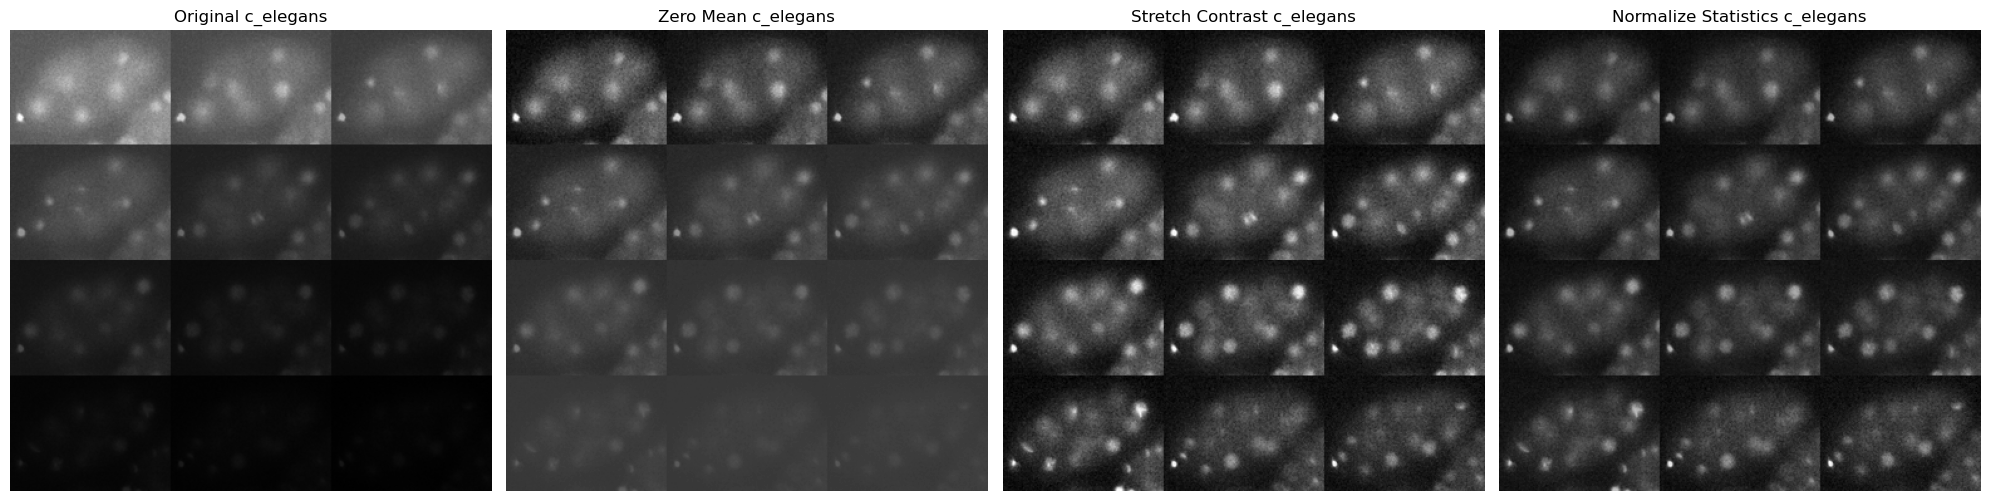

In [33]:
# Define the lists of images and titles
image_list = [montage_original, montage_zero_mean, montage_stretch_contrast, montage_normalize_statistics]
title_list = ['Original c_elegans', 'Zero Mean c_elegans', 'Stretch Contrast c_elegans', 'Normalize Statistics c_elegans']

# Display the montages
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for ax, img, title in zip(axes, image_list, title_list):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')
plt.tight_layout()
plt.show()

### Multiple choice questions

* Q3: Why does the bottom-right corner of the **Zero Mean Montage** have lower contrast than the top-left corner? (**0.5 points**)

1. Because the different subimages in the montage have different spreads of values around their mean.
2. It is an illumination effect.
3. The bottom-right subimages of the montage are defective.

Modify the variable `answer` in the next cell to reflect your choices.

In [ ]:
# Assign your answer to this variable
answers['Q3'] = 1
# YOUR CODE HERE

In [ ]:
assert answers['Q3'] in [1, 2, 3], 'Possible answers are 1, 2 or 3' 

* Q4: Why is this not the case for the other two montages? (**0.5 points**)

1. Because the images already had zero mean.
2. Because the other two functions modify the contrast by adjusting the range of intensities.

Modify the variable `answer` in the next cell to reflect your choices. As usual, there is another cell that will remind you to select a valid choice if you haven't.

In [ ]:
# Assign your answer to this variable
answers['Q4'] = 2
# YOUR CODE HERE

In [ ]:
assert answers['Q4'] in [1, 2], 'Possible answers are 1 and 2'

# The Fourier transform (6.5 points)

In this second part we will look at the 2D discrete Fourier transform (*DFT*).

You are going to:
 * understand the effects of the elements in an image on its Fourier transform (*FT*), and then
 * understand how an image is reconstructed from its FT using the inverse Fourier transform (*iFT*). 

To compute the FT in Python, we will use the [`fft` module](https://numpy.org/doc/stable/reference/routines.fft.html) in NumPy, which implements the *FT* using a [fast Fourier transform (FFT)](https://en.wikipedia.org/wiki/Fast_Fourier_transform) algorithm.

## <a id="ToC_2_Fourier_transform"></a>Table of contents

1. [Understanding the Fourier transform and its inverse](#1.-Understanding-the-Fourier-transform-and-its-inverse-(4-points)) **(4 points)**
2. [Reconstruction of an image](#2.-Reconstruction-of-an-image-(2.5-points)) **(2.5 points)**
    1. [Reconstruction error](#2.A.-Reconstruction-error-(1-point))
    2. [Fourier components](#2.B.-Fourier-components-(1-point))

# 1. Understanding the Fourier transform and its inverse (4 points)
[Back to table of contents](#ToC_2_Fourier_transform)

First, we will provide the functions `fourier(img)` and `inverse_fourier(ft)`, which calculate the FT and the iFT respectively.

Make sure to understand how we use the <a href='https://numpy.org/doc/stable/reference/routines.fft.html'><code>numpy.fft</code></a> module.

<!--
<div class="alert alert-info">
<b>Note:</b> The <a href='https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html'><code>ft = np.fft.fft2(img)</code></a> function computes the 2D Fourier transform <code>ft</code> of an image <code>img</code> within the frequency range $[0, \pi]$. In this representation, when displaying <code>ft</code>, the zero-frequency component is located at the origin of the image (top left corner). However, it's more natural to have the zero-frequency component at the center of the image <code>ft</code>. To achieve this, we can apply the <a href='https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html#numpy.fft.fftshift'><code>np.fft.fftshift(ft)</code></a> function, which shifts the frequency range of <code>ft</code> from $[0, \pi]$ to $[-\frac{\pi}{2}, \frac{\pi}{2}]$. 
</div>
-->

In [34]:
# Function that returns the FT
def fourier(img):
    # Generate the FT
    ft = np.fft.fft2(img)
    # Shift the frequency range to [-pi/2, pi/2] 
    shift_ft = np.fft.fftshift(ft)
    return shift_ft

# Function that return the inverse FT
def inverse_fourier(ft):
    # Shift the FT back to [0, pi]
    ft = np.fft.ifftshift(ft)
    # Get the inverse FT
    ift = np.fft.ifft2(ft)
    # Clip the imaginary part of the reconstruction
    # (should be approximately zero anyway)
    ift = np.real(ift)
    return ift

Calculating the FT of an image generates a two-dimensional array (image) of complex values, which makes it challenging to visualize effectively. Therefore, we usually extract the **magnitude** and **phase** of the complex numbers. The magnitude of a complex number $z\in\mathbb{C}$ is given by

$$|z| = \sqrt{\operatorname{Re}(z)^2+\operatorname{Im}(z)^2}.$$

Moreover, we usually visualize this magnitude in decibels (dB) using the formula

$$|z|~[\mathrm{dB}] = 10\log_{10}\left(|z|^2\right)= 20\log_{10}\left(|z|\right).$$

This approach is favored because the magnitude of the Fourier transform can vary significantly, covering both small and large values. The logarithmic transformation enables us to represent both ranges in a single image.

For **1 point**, complete the function `magnitude(ft)` which should return **the magnitude in decibels (`dB`)** of a FT given as an input parameter
 
<div class="alert alert-info">

<b>Hints:</b>
Check the Numpy built-in functions for complex numbers, pay attention to the base of the log function you use.
</div>

<div class="alert alert-danger">
<b>Warning:</b> Using <code>np.absolute</code> in this exercise will give you <b>0 points</b>! We want you to implement the function yourself.
</div>

In [37]:
# Function that returns the magnitude of the FT in dB
def magnitude(ft):
    output = None
    epsilon = 1e-10  # Small constant to avoid log(0)
    
    # Compute magnitude
    mag = np.abs(ft)
    
    # Convert to dB
    output = 20 * np.log10(mag + epsilon)
    
    return output

In [38]:
# Let's do a sanity check
# The complex number used for the test which has a magnitude of ~3 dB
z = 1 + 1j
# Check that the magnitude function is correct
if np.round(magnitude(z), decimals=1) == 3.0:
    print("Nice, your magnitude function passed the basic sanity check!")
else:
    print("Something isn't quite right yet.")

Nice, your magnitude function passed the basic sanity check!



Now, we will define a function to calculate the phase of the *FT*. For this we define the function `phase(ft)`, which takes as argument an *FT* and returns its phase.

Remember that the phase of a complex number $z$ is given by
$$\angle(z)=\arctan\left(\frac{\operatorname{Im}(z)}{\operatorname{Re}(z)}\right)\,.$$

For **1 points**, complete the function `phase(ft)` in the cell below according to the equation given above.

<div class="alert alert-info">
<b>Hint:</b> Compare <a href="https://numpy.org/doc/stable/reference/generated/numpy.arctan2.html" ><code>np.arctan2()</code></a> and <a href="https://numpy.org/doc/stable/reference/generated/numpy.arctan.html#numpy.arctan" ><code>np.arctan()</code></a>, which one is more convenient to calculate $\angle(z)$? 
</div>
<div class="alert alert-danger">
<b>Warning:</b> Using <code>np.angle</code> in this exercise will give you <b>0 points</b>! Implement the function yourself.
</div>

In [42]:
# Function that calculates the phase of complex numbers
def phase(ft):
    output = None
    
    # YOUR CODE HERE
    output = np.angle(ft)  # Compute the phase angle in radians

    
    return output

In [43]:
# Let's do a sanity check
# The complex number used for the test which has a phase of pi/4
z = 1 + 1j
# Check that the magnitude function is correct
if phase(z) == np.pi/4:
    print("Nice, your phase function passed the sanity check!")
else:
    print("Something isn't quite right yet.")

Nice, your phase function passed the sanity check!


Now, let's run the next cell to observe the outcomes of the functions you just coded. For this we will apply the *FT* to the image `car`, calculate its magnitude and phase, and visualize the results as images.

</div>
<div class="alert alert-success">
<b>Hint:</b> If you don't see the phase of the image, use the sliding bar to slide to the right. You can also use <code>Ctrl + b</code> to hide the left sidebar of JupyterLab. 
</div>

If everything went well you should see:
<ul><li>For the magnitude: a diagonal cross in the center with stars spread over the image, and</li>
<li>For the phase: random noise, cut by a near vertical line and a few other straight lines.</li>
</ul>


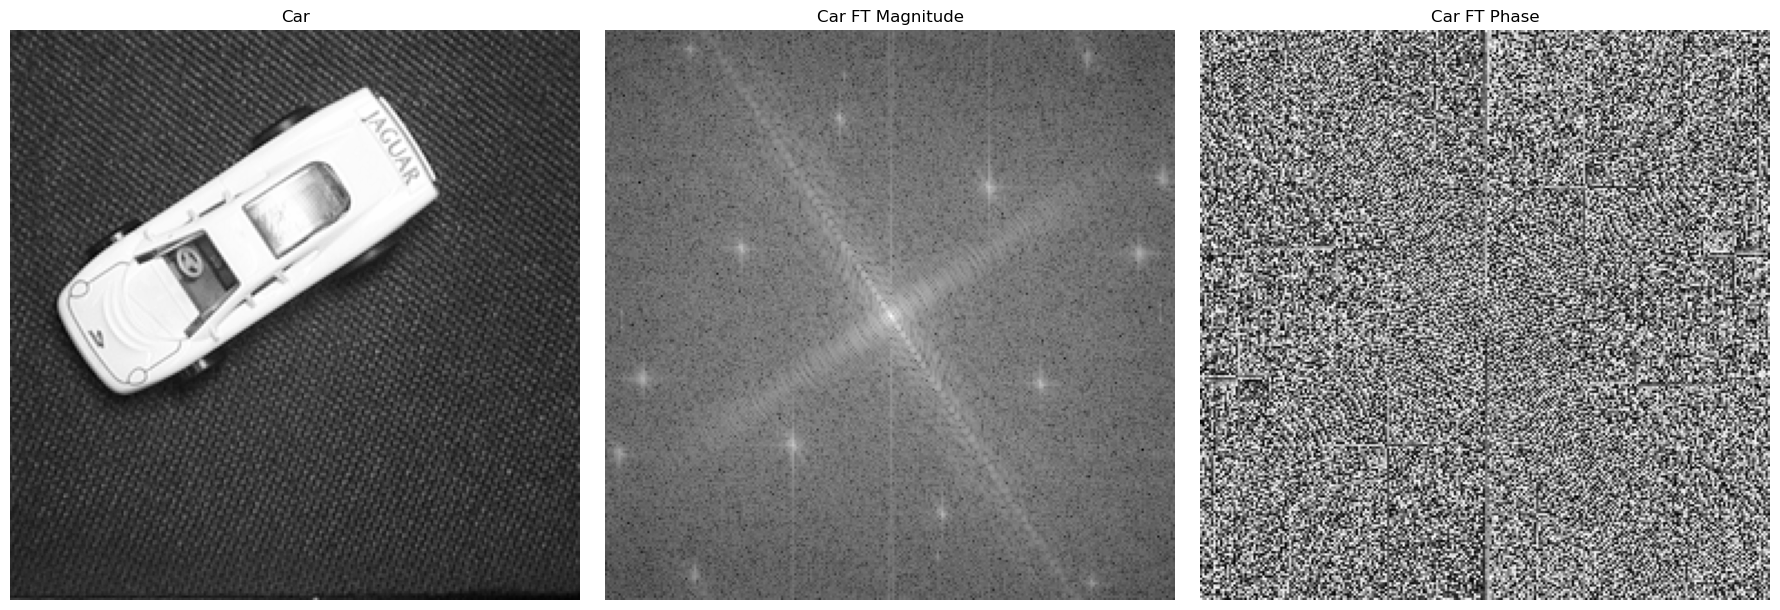

In [44]:
# Generate the FT of car with its magnitude and phase
car_ft = fourier(car)
car_ft_mag = magnitude(car_ft)
car_ft_ph = phase(car_ft)

# Visualize the results
plt.figure(figsize=(18, 6))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(car, cmap='gray')
plt.title('Car')
plt.axis('off')

# Magnitude of FT
plt.subplot(1, 3, 2)
plt.imshow(car_ft_mag, cmap='gray')
plt.title('Car FT Magnitude')
plt.axis('off')

# Phase of FT
plt.subplot(1, 3, 3)
plt.imshow(car_ft_ph, cmap='gray')
plt.title('Car FT Phase')
plt.axis('off')

plt.tight_layout()
plt.show()

### Multiple Choice Questions 
The following MCQs will test your understanding of the relationship of an image with its FT **magnitude**. Each is worth **0.5 points**.

Run the next cell to visualize the images `pens` and `car` together with their FT magnitudes and answer the upcoming questions.

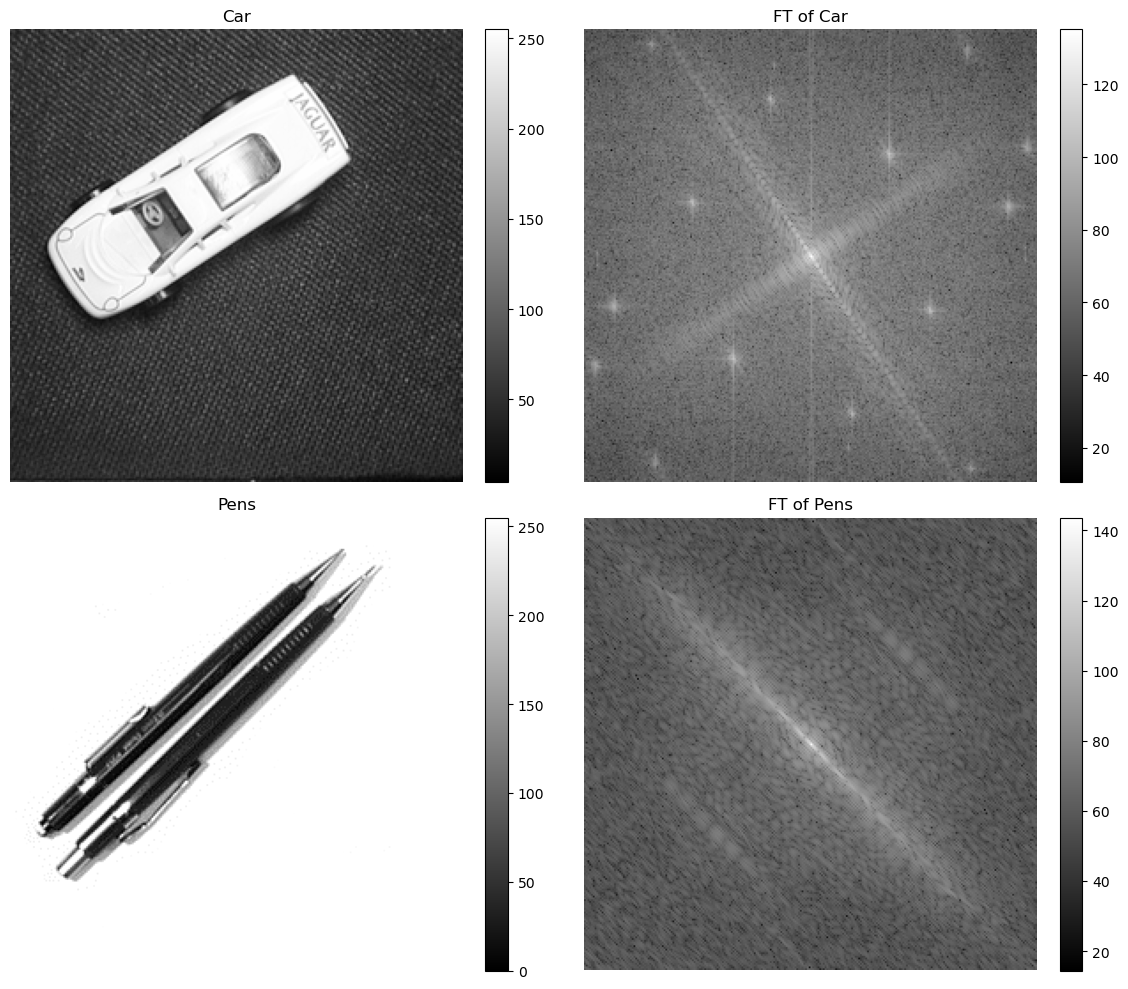

In [45]:
# Get the FT magnitudes of the images using the fourier and magnitude functions
car_ft  = magnitude(fourier(car))
pens_ft = magnitude(fourier(pens))

# Define the lists of images and titles
image_list = [car, car_ft, pens, pens_ft]
title_list = ['Car', 'FT of Car', 'Pens', 'FT of Pens']

# Display results in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()
for i, (img, title) in enumerate(zip(image_list, title_list)):
    im = axes[i].imshow(img, cmap='gray')
    axes[i].set_title(title)
    axes[i].axis('off')
    plt.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

* Q5: Where do the little stars at different distances from the center in the FT of `car` come from? (**0.5 points**)
    1. From the car.
    2. From the driver.
    3. From the carpet under the car.
    4. From the details of the car (JAGUAR text, doors, steering wheel, etc).
    5. From the size of the image.

In the next cell, modify the variable `answer` to reflect your choice.

In [52]:
# Assign your answer to this variable
answers['Q5'] = 4
# YOUR CODE HERE

In [53]:
assert answers['Q5'] in [1, 2, 3, 4, 5], 'Possible answers are 1, 2, 3, 4 and 5'

* Q6: Where do the two big intersecting lines in `car` come from? (**0.5 points**)
    1. From the contour of the car.
    2. From the driver.
    3. From the carpet under the car.
    4. From the details of the car (JAGUAR text, doors, steering wheel, etc).
    5. From the size of the image.

In the next cell, modify the variable `answer` to reflect your choice.

In [50]:
# Assign your answer to this variable
answers['Q6'] = 1
# YOUR CODE HERE

In [51]:
assert answers['Q6'] in [1, 2, 3, 4, 5], 'Valid answers are 1, 2, 3, 4, and 5'

* Q7: Why is there only one main line in the FT of `pens`, if there are two pens? (**0.5 points**)
    1. Because the background is constant.
    2. Because they are ballpoint pens and not fountain pens.
    3. Because the two pens are aligned.
    4. Because the two pens are close to each other.

In the next cell, modify the variable `answer` to reflect your choice.

In [46]:
# Assign your answer to this variable
answers['Q7'] = 3
# YOUR CODE HERE

In [47]:
assert answers['Q7'] in [1, 2, 3, 4], 'Valid answers are 1, 2, 3 or 4'

* Q8: Why is the main line in the *FT* not aligned with the pens? (**0.5 points**) 

    1. The frequency of a contour is perpendicular to the contour. 
    2. The main periodicity in the image is *parallel* to the pens because they have rough surfaces.
    3. The ploting function rotates the FT.
    4. Numpy rotates the FT.

In the next cell, modify the variable `answer` to reflect your choice.

In [48]:
# Assign your answer to this variable
answers['Q8'] = 1
# YOUR CODE HERE

In [49]:
assert answers['Q8'] in [1, 2, 3, 4, 5], 'Valid answers are 1, 2, 3, 4 and 5'

# 2. Reconstruction of an image (2.5 points)
[Back to table of contents](#ToC_2_Fourier_transform)

As you learned in the course, it is possible to reconstruct an image from its Fourier transform by performing the inverse Fourier transform. In the next exercise we will investigate the role that the magnitude and phase of the *FT* has on the reconstruction of an image. For this we first need to create a function that reconstructs an image from its *FT* magnitude (in $\mathrm{dB}$) and phase.

Run the next cell to define the function `reconstruct` and make sure that you understand every line of the code.

In [54]:
# Function that reconstructs an image from its FT magnitude (in dB) and phase
def reconstruct(mag, ph):
    # Convert magnitude from dB to linear scale
    mag = 10 ** (mag / 20)
    # Restore complex Fourier Transform using polar representation
    ft = mag * np.exp(1j * ph)
    # Reconstruct the image using the inverse Fourier function
    return inverse_fourier(ft)

Let's see if the function works. Run the cell below to reconstruct the car image from its magnitude and phase, and visualize the result. 

<div class = 'alert alert-danger'>
<b>Warning:</b> If the reconstruction is not near perfect, check again your functions <code>magnitude</code> and <code>phase</code>. You will need both functions to answer the next questions. 
</div>

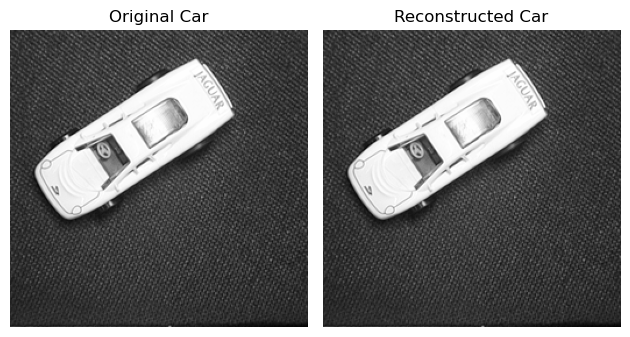

In [55]:
# Reconstruct the car image
car_reconstructed = reconstruct(car_ft_mag, car_ft_ph)

# Display the result
plt.close('all')

# Original image
plt.subplot(1, 2, 1)
plt.imshow(car, cmap='gray')
plt.title("Original Car")
plt.axis('off')

# Reconstructed image
plt.subplot(1, 2, 2)
plt.imshow(car_reconstructed, cmap='gray')
plt.title("Reconstructed Car")
plt.axis('off')

plt.tight_layout()
plt.show()

# Assert that the reconstruction is close to the original
np.testing.assert_array_almost_equal(
    car, car_reconstructed, err_msg='Check your magnitude and phase functions!'
)

Since we didn't make any changes to the *FT* before the reconstruction, the reconstructed image should be (almost) identical to the original image (if it's not, you should have seen an error message). 

For the next excercise we will use the `mandrill` image in addition to the car image.

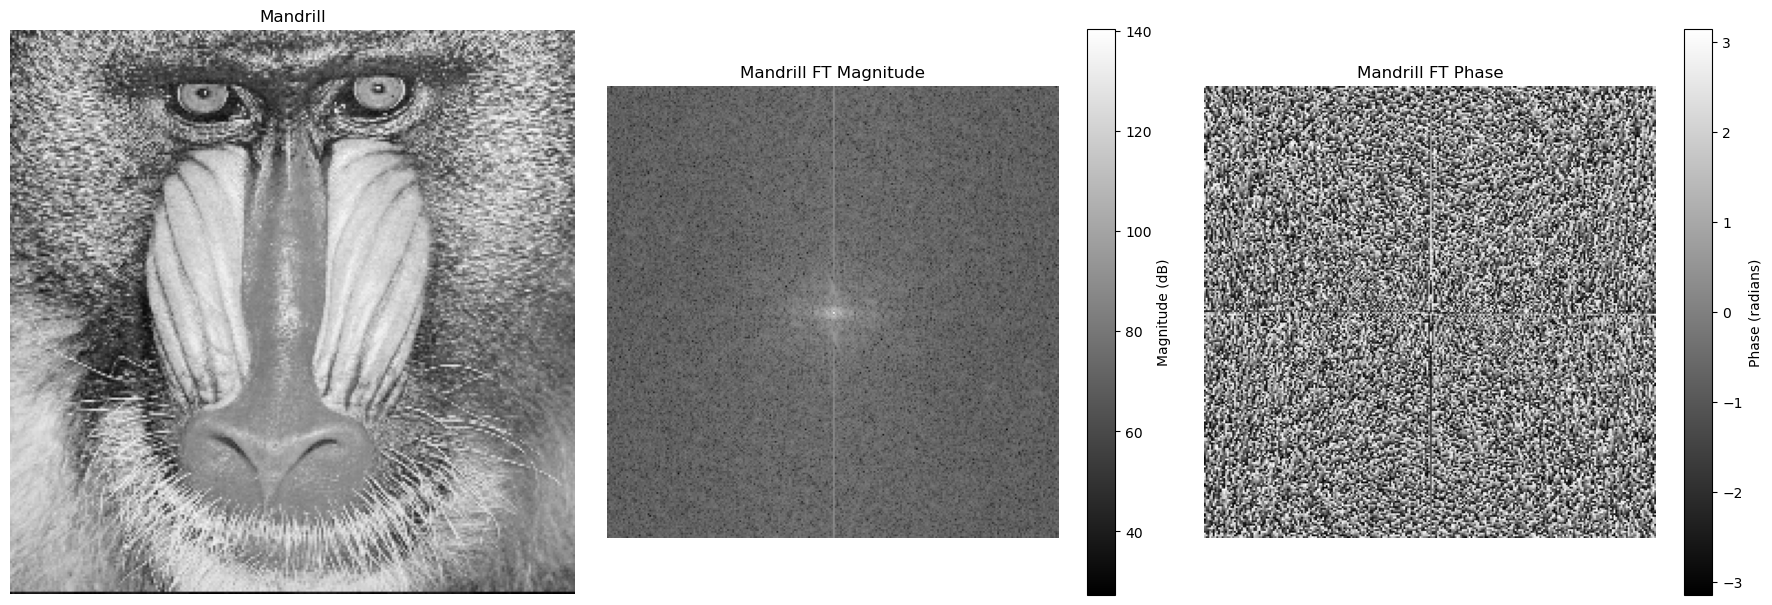

In [56]:
# Generate FT of the mandrill image and extract the magnitude and phase
mandrill_ft = fourier(mandrill)
mandrill_ft_mag = magnitude(mandrill_ft)
mandrill_ft_ph = phase(mandrill_ft)

# Visualize
plt.close('all')
plt.figure(figsize=(18, 6))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(mandrill, cmap='gray')
plt.title("Mandrill")
plt.axis('off')

# Magnitude of FT
plt.subplot(1, 3, 2)
plt.imshow(mandrill_ft_mag, cmap='gray')
plt.title("Mandrill FT Magnitude")
plt.colorbar(label="Magnitude (dB)")
plt.axis('off')

# Phase of FT
plt.subplot(1, 3, 3)
plt.imshow(mandrill_ft_ph, cmap='gray')
plt.title("Mandrill FT Phase")
plt.colorbar(label="Phase (radians)")
plt.axis('off')

plt.tight_layout()
plt.show()

Now let's see what happens if we use the magnitude of one image and the phase of another image to do the reconstruction. What do you think will happen? Run the cell below and observe the results. Try to make a conclusion on what type of information is stored in the phase of the *FT*.

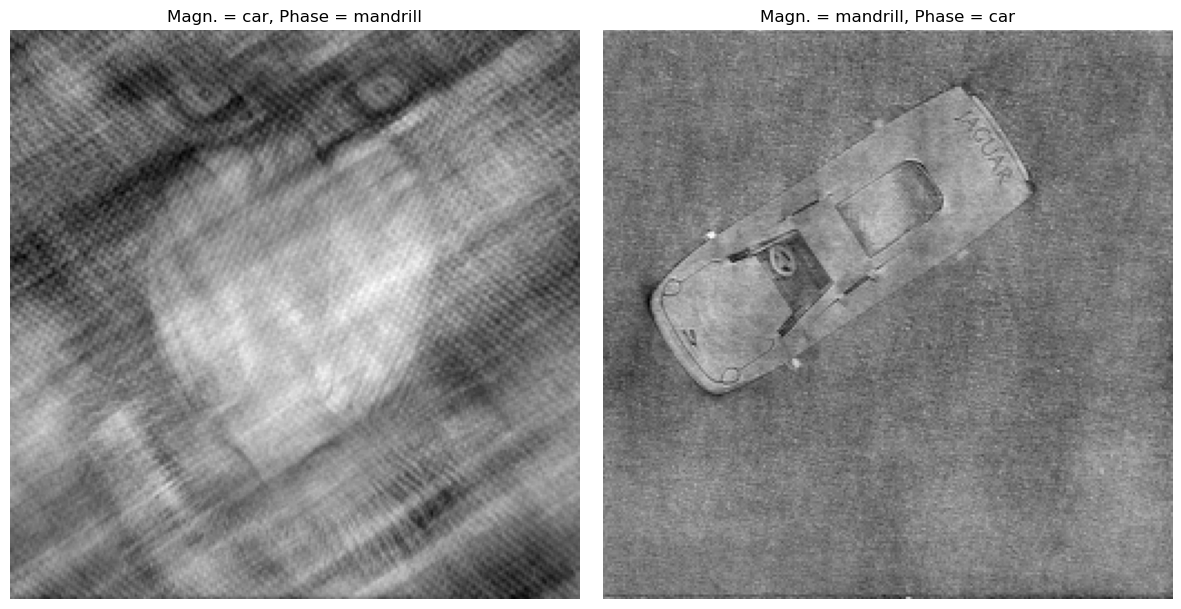

In [57]:
# Reconstruct an image with the magnitude of car and phase of mandrill
car_mandrill = reconstruct(car_ft_mag, mandrill_ft_ph)
# Reconstruct an image with the magnitude of mandrill and phase of car
mandrill_car = reconstruct(mandrill_ft_mag, car_ft_ph)

# Visualize the results
plt.close('all')
plt.figure(figsize=(12, 6))

# Magnitude = car, Phase = mandrill
plt.subplot(1, 2, 1)
plt.imshow(car_mandrill, cmap='gray')
plt.title("Magn. = car, Phase = mandrill")
plt.axis('off')

# Magnitude = mandrill, Phase = car
plt.subplot(1, 2, 2)
plt.imshow(mandrill_car, cmap='gray')
plt.title("Magn. = mandrill, Phase = car")
plt.axis('off')

plt.tight_layout()
plt.show()

### Multiple choice question

* Q9: What type of information of the image is stored in the **phase** of the FT that is **not stored** in the magnitude? (**0.5 points**)

1. The spacial frequencies contained in the image.
2. The light intensity of each pixel.
3. The location and shape of objects in the image.

Modify the variable `answer` in the next cell to reflect your choice.

In [58]:
# Assign your answer to this variable
answers['Q9'] = 3
# YOUR CODE HERE

In [59]:
# Sanity check
assert answers['Q9'] in [1, 2, 3], 'Valid answers are 1, 2 or 3'

## 2.A. Reconstruction error (1 point)
[Back to table of contents](#ToC_2_Fourier_transform)

How many Fourier coefficients do we really need to keep to still have the basic information present in an image? Do all coefficients contribute the same? In order to quantify _how good_ a certain reconstruction is, we will use a metric to assess the quality of the reconstruction.

The metric we use is the normalized mean square error (NMSE) in dB. It calculates the difference between an image $f$ of size $K\times L$ and its reconstruction $g$ normalizes by the total power of $f$.

$$\operatorname{NMSE}_f(g) =  \frac{\sum_{k=1}^{K} \sum_{l=1}^L (g[k,l] - f[k,l])^2}{\sum_{m=1}^{K} \sum_{n=1}^L f[m,n]^2}, \qquad \qquad \operatorname{NMSE}_f(g)~[\mathrm{dB}] = 10 \log_{10}\left(\operatorname{NMSE}_f(g)\right).$$

This makes it easier for one to observe, for example, when the error has doubled ($+3~\mathrm{dB}$) or halved ($-3~\mathrm{dB}$) in plots.

For **1 point**, complete the function `nmse(f, g)` in the cell below according to the equation given above, where `f` and `g` are two NumPy arrays of the same shape.

<div class="alert alert-danger">
<b>Warning</b>: Remember that your function should <b>not use <code>for</code> loops</b> to iterate through images (this will give you $0$ points), and should work for NumPy arrays of any shape.
</div>

In [70]:
# Function that calculates the Normalized Mean Square Error in dB
def nmse(f, g):    
    output = None
    # Compute the numerator: Sum of squared differences
    numerator = np.sum((g - f) ** 2)
    # Compute the denominator: Total power of f
    denominator = np.sum(f)
    denominator = denominator ** 2
    # Compute NMSE
    NMSE = numerator/denominator     
    # Convert to dB
    output = 10 * np.log10(NMSE)
    return output

In [71]:
# Sanity check (do not worry about the divide by zero note)
if  nmse(impulse, impulse) != -np.infty: 
    print('The error between two equal images should be zero. In dB -infinity.')
# Check your function on the hrct image
elif nmse(impulse, 0) != 0:
    print('The error of any image and a zero-image should be 1. In dB, 0.')
else:
    print('Nice, your function seems to work! Do not worry about the divide by zero warning!')

Nice, your function seems to work! Do not worry about the divide by zero warning!


/tmp/ipykernel_345/2562345782.py:12: RuntimeWarning: divide by zero encountered in log10
  output = 10 * np.log10(NMSE)


## 2.B. Fourier components (1 point)
[Back to table of contents](#ToC_2_Fourier_transform)

In this section, we look into the reconstruction process of an image from part of its Fourier components. This touches a topic: how much does a given transform compress an image? 

We define a function `clip_fourier(img, percent)` that reconstructs an image for only `percent`$\%$ of its Fourier coefficients. If `largest=True`, only the largest are kept, while 
if `largest=False`, they are excluded and only all the rest are kept. This will illustrate the uneven distribution of information contained in the Fourier components.

Run the next cell to define the function `clip_fourier`.

In [72]:
 def clip_fourier(img, percent, largest=True, perc=True):
    # Get number of coefficients to keep
    if perc:
        n = np.round(img.size * percent / 100 ).astype(int)
    else: 
        n = percent
    img_ft = np.fft.fft2(img)
    # Get the threshold value. To do this, we order the Fourier coefficients 
    # from low to high and select the n-to-last ([-n]) coefficients
    threshold = np.sort(np.abs(img_ft.flatten()))[-n]
    # Get the inverse Fourier transform of the thresholded Fourier transform
    if largest == True:
        clipped_ift = np.real(np.fft.ifft2((np.abs(img_ft) >= threshold) * img_ft))
    else:
        clipped_ift = np.real(np.fft.ifft2((np.abs(img_ft) < threshold) * img_ft))
    return clipped_ift

Let's use the error metric `nmse` defined before to illustrate the difference in information contained in the few largest Fourier components compared to the information contained in the rest. In the cell below we will reconstruct the image `zebra` using: 
 * only the `percent` largest Fourier components, and 
 * using the `100-percent` smallest components. 

Then we will compare the reconstruction error by applying the `nmse` function defined above with both reconstructions. Run the cell below to see the different reconstruction errors. Play with the variable `percent` and see what happens.

The reconstruction error when using the 20% largest  components: NMSE = -82.3107
The reconstruction error when using the 80% smallest components: NMSE = -58.6063


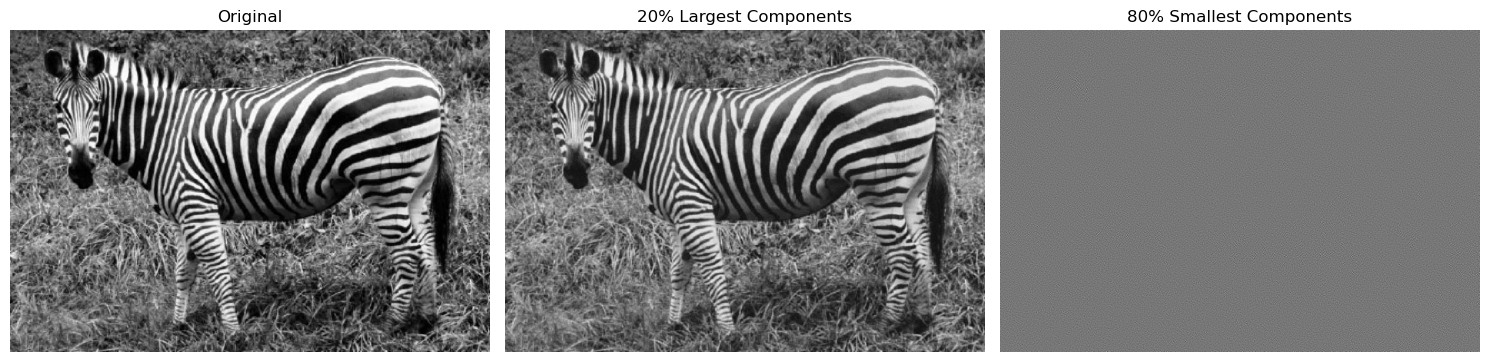

In [73]:
import warnings
# Suppress traitlets deprecation warning - do not modify
warnings.simplefilter("ignore")

percent = 20
# First, reconstruct zebra using the largest components
zebra_largest = clip_fourier(zebra, percent)
# Reconstruct zebra using the smallest components
zebra_smallest = clip_fourier(zebra, percent, largest=False)
# Calculate the errors
error_l = nmse(zebra,zebra_largest )
error_s = nmse(zebra,zebra_smallest)
# Compare the error
print(f'The reconstruction error when using the {percent}% largest  components: NMSE = {error_l:.4f}')
print(f"The reconstruction error when using the {100 - percent}% smallest components: NMSE = {error_s:6.4f}")

# Visualize images
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(zebra, cmap='gray')
plt.title('Original')
plt.axis('off')

# Image with largest components
plt.subplot(1, 3, 2)
plt.imshow(zebra_largest, cmap='gray')
plt.title(f'{percent}% Largest Components')
plt.axis('off')

# Image with smallest components
plt.subplot(1, 3, 3)
plt.imshow(zebra_smallest, cmap='gray')
plt.title(f'{100 - percent}% Smallest Components')
plt.axis('off')

plt.tight_layout()
plt.show()

In the long run, this type of characteristics of transforms are explored using graphs like the one below, where the NMSE can be seen as a function of the percentage of the largest coefficients kept.

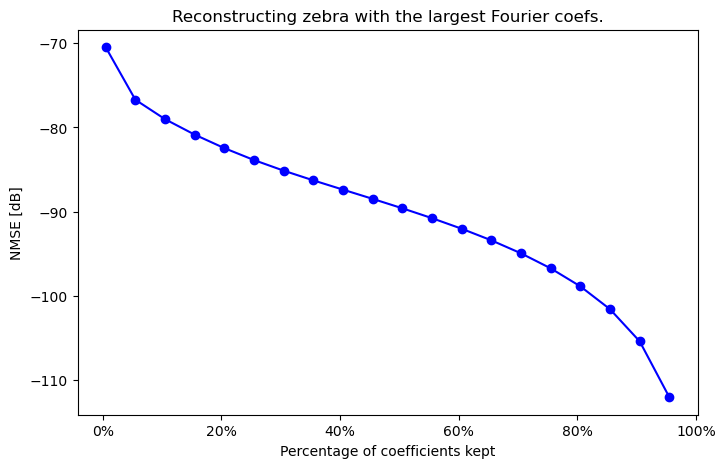

In [74]:
plt.close("all")
# Create figure
fig = plt.figure(figsize=(8,5));
# Plot the NMSE vs kept coefficients curve
plt.plot(np.arange(.5, 100, 5), [nmse(zebra, clip_fourier(zebra, perc)) for perc in np.arange(.5, 100, 5)], 'bo-');
# Labels and titles for clear plotting
plt.xlabel("Percentage of coefficients kept"); plt.ylabel("NMSE [dB]"); 
plt.xticks([0, 20, 40, 60, 80, 100], [f"{perc}%" for perc in [0, 20, 40, 60, 80, 100]]);
plt.title("Reconstructing zebra with the largest Fourier coefs.")
plt.show()

Now we will visualize the effect of clipping fourier. 

You can define an integer `n` such that **the number of largest coefficients kept is $2^n$**. 
<div class = "alert alert-info">
<b>Note</b>: This is because the visual difference between the reconstructions is only apparent for percentages between $0\%$ and $2\%$, and very small steps would be needed. Keep in mind that you are not working with percentages anymore.
    
</div>


In [91]:
# YOUR CODE HERE
# Adjust the value of n as needed
n = 8

use_largest = True  # True to retain largest components, False for smallest components

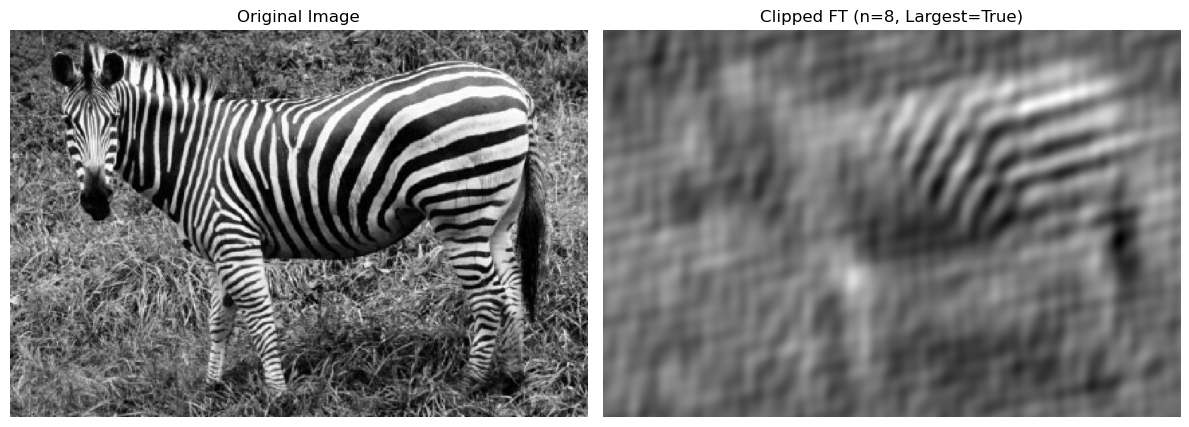

In [92]:
# Process the image
output = clip_fourier(zebra, 2**n, largest=use_largest, perc=False)

# Visualize the original and processed images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(zebra, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Processed image
plt.subplot(1, 2, 2)
plt.imshow(output, cmap='gray')
plt.title(f"Clipped FT (n={n}, Largest={use_largest})")
plt.axis('off')

plt.tight_layout()
plt.show()

### Multiple Choice Question
Congratulations! You made it to the end of the notebook. Now you just need to answer these last two MCQ questions (**0.5 points** each).

* Q10: How many largest Fourier coefficients are required to start clearly seeing a zebra shape in the image?
    1. $2^{1}$
    2. $2^{4}$
    3. $2^{11}$
    4. $2^{16}$

Modify the variable `answer` to reflect your choice. 

In [93]:
# Assign your answer to this variable
answers['Q10'] = 2
# YOUR CODE HERE

In [94]:
assert answers['Q10'] in [1, 2, 3, 4], 'Possible answers are 1, 2, 3 and 4'

* Q11: How is it possible to reconstruct a non-periodic object such as the zebra (there is only one zebra in the image) in an image from only periodic components?
    1. The black and white stripes in the zebra make it possible.
    2. The FT assumes that the image is periodic in space.
    3. The biggest components of the FT are non-periodic, to account for such features in an image.

Modify the answer variable to reflect your choice. 

In [95]:
# Assign your answer to this variable
answers['Q11'] = 3
# YOUR CODE HERE

In [96]:
assert answers['Q11'] in [1, 2, 3], 'Possible answers are 1, 2, and 3'

print all answers:

In [97]:
print(answers)

{'Q1': 3, 'Q2': 2, 'Q7': 3, 'Q8': 1, 'Q6': 1, 'Q5': 4, 'Q9': 3, 'Q10': 2, 'Q11': 3}


<div class="alert alert-success">
<p><b>Congratulations on finishing the Pixel-Fourier lab!</b></p>
<p>
Make sure to save your notebook (you might want to keep a copy on your personal computer) and upload both the <b>PDF and notebook file</b> to <a href="https://www.gradescope.com/courses/938339">Gradescope</a>.
</p>
</div>